This is an attempt to find a second time constant. It will begin with a shift to zero and then a shift in the fourier domain to have it centered. 

Mira

In [91]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
import scipy.optimize as op
from scipy.optimize import curve_fit

sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee

In [92]:
with open('../../data/raw_data/20170615_1730_20mms_reference.pkl', 'rb') as f:
    d = pickle.load(f, encoding='latin1') 

In [93]:
i = 4
Nsize = 2**i

dt=(1/(d['sample freq'])) #period
T1=dt*(Nsize) #full period
v=(d['speed'])
X = v*T1 #full distance
dx = dt*v #smallest amount of distance travelled
total_t = (d['scan time']) #how long it ran
    
total_s = (d['samples requested']) #number of samples 
startpt = ((total_s - Nsize)/2) #starting point


endpt = startpt + Nsize #ending point


df = 1/T1
f = df*np.arange(Nsize/2)+df/2.0
fFull = df*np.arange((Nsize/2) + 1)+df/2.0

startpt = int(startpt)
endpt = int(endpt)
F = (d['sig0F']) 
Dfit = F[startpt-3:endpt-1]
D = F[startpt:endpt]

a = d['delay0F']/v
tfit = a[startpt-3:endpt-1]
t = a[startpt:endpt]


In [94]:
i = 9
Nsize = 2**i

dt=(1/(d['sample freq'])) #period
T1=dt*(Nsize) #full period
v=(d['speed'])
X = v*T1 #full distance
dx = dt*v #smallest amount of distance travelled
total_t = (d['scan time']) #how long it ran
    
total_s = (d['samples requested']) #number of samples 
startpt = ((total_s - Nsize)/2) #starting point


endpt = startpt + Nsize #ending point


df = 1/T1
f = df*np.arange(Nsize/2)+df/2.0
fFull = df*np.arange((Nsize/2) + 1)+df/2.0

startpt = int(startpt)
endpt = int(endpt)
F = (d['sig0F']) 
D = F[startpt:endpt]

a = d['delay0F']/v
t = a[startpt:endpt]


In [95]:
def quadfunc(x,a,b,c):
    return a*x**2 + b*x + c

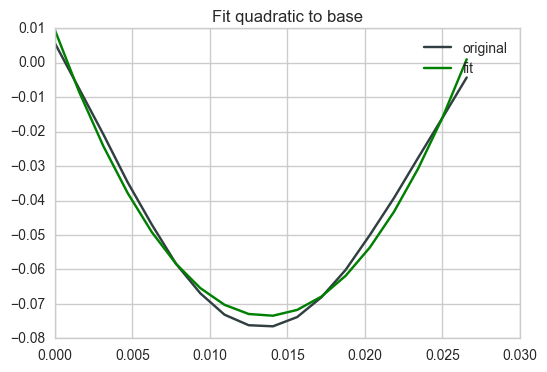

In [96]:
p0 = [400, -10, .007]
popt, pcov = curve_fit(quadfunc,tfit,Dfit, p0 = p0)
pl.plot(tfit,Dfit, label = 'original')
pl.plot(tfit,quadfunc(tfit,*popt), color = 'green', label = 'fit')
pl.legend()
pl.title('Fit quadratic to base')
pl.show()

In [97]:
popt

array([  4.46057746e+02,  -1.21653613e+01,   9.41791089e-03])

In [98]:
print ('shift= ', popt[2])

shift=  0.00941791089336


shift by  6.02746297175 terms


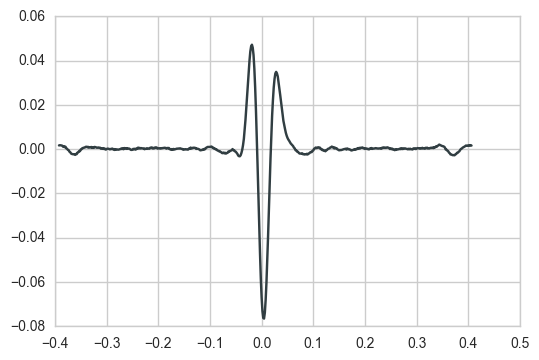

In [107]:
tshift = [x - popt[2] for x in t]
pl.plot(tshift,D)
print ('shift by ', popt[2]/dt, 'terms') 
pl.title('shifted by optimal')
pl.show()

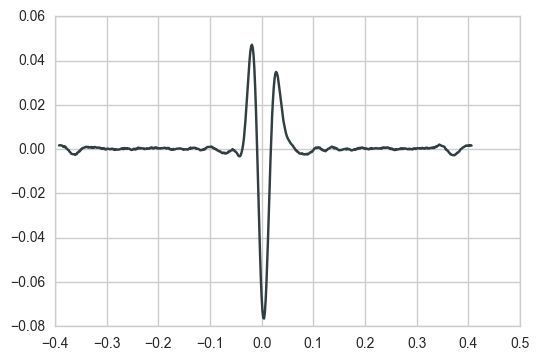

In [108]:
t2 = a[startpt-6:endpt-6]
pl.plot(t2,D)
pl.title('shifted by sampling')
pl.show()